In [15]:
import numpy as np

# 데이터 파일 경로 설정
data_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/WAVE_10409339_220610.npy'
rpeak_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/Rpeak_10409339_220610.npy'
ppg_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/PPG_10409339_220610.npy'

data = np.load(data_path)   

datenum_diffs = np.diff(data[3, :100])

### 분단위로 x축 조정

/tmp/ipykernel_250231/1799565396.py:35: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


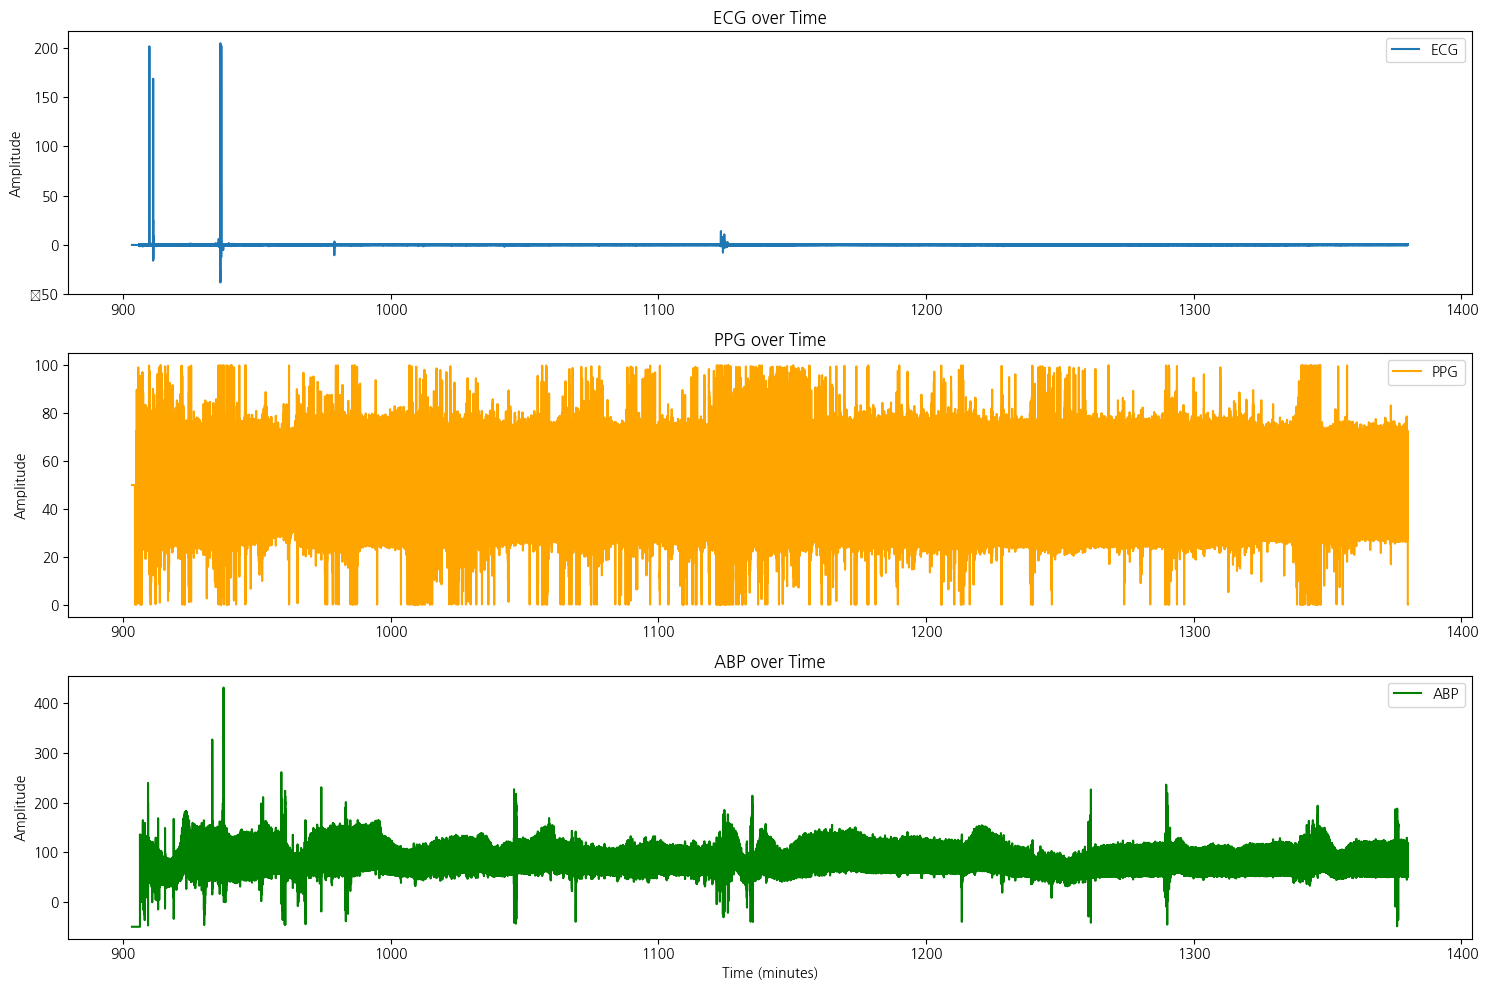

In [17]:
import matplotlib.pyplot as plt

minutes_in_day = 24 * 60  
datenum_to_minutes = data[3, :] * minutes_in_day

plt.figure(figsize=(15, 10))

time_vector_minutes = datenum_to_minutes

plt.subplot(3, 1, 1)
plt.plot(time_vector_minutes, data[0, :], label='ECG')
plt.legend()
plt.title('ECG over Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(time_vector_minutes, data[1, :], label='PPG', color='orange')
plt.legend()
plt.title('PPG over Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(time_vector_minutes, data[2, :], label='ABP', color='green')
plt.legend()
plt.title('ABP over Time')
plt.ylabel('Amplitude')

plt.xlabel('Time (minutes)')
plt.tight_layout()  
plt.show()


### 시간 단위로 조정

- 데이터를 시간단위로 쪼갰을 때 15부터 시작하는건 아무래도 측정 시간이 15시부터인거 같습니다

/tmp/ipykernel_250231/300546583.py:35: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap


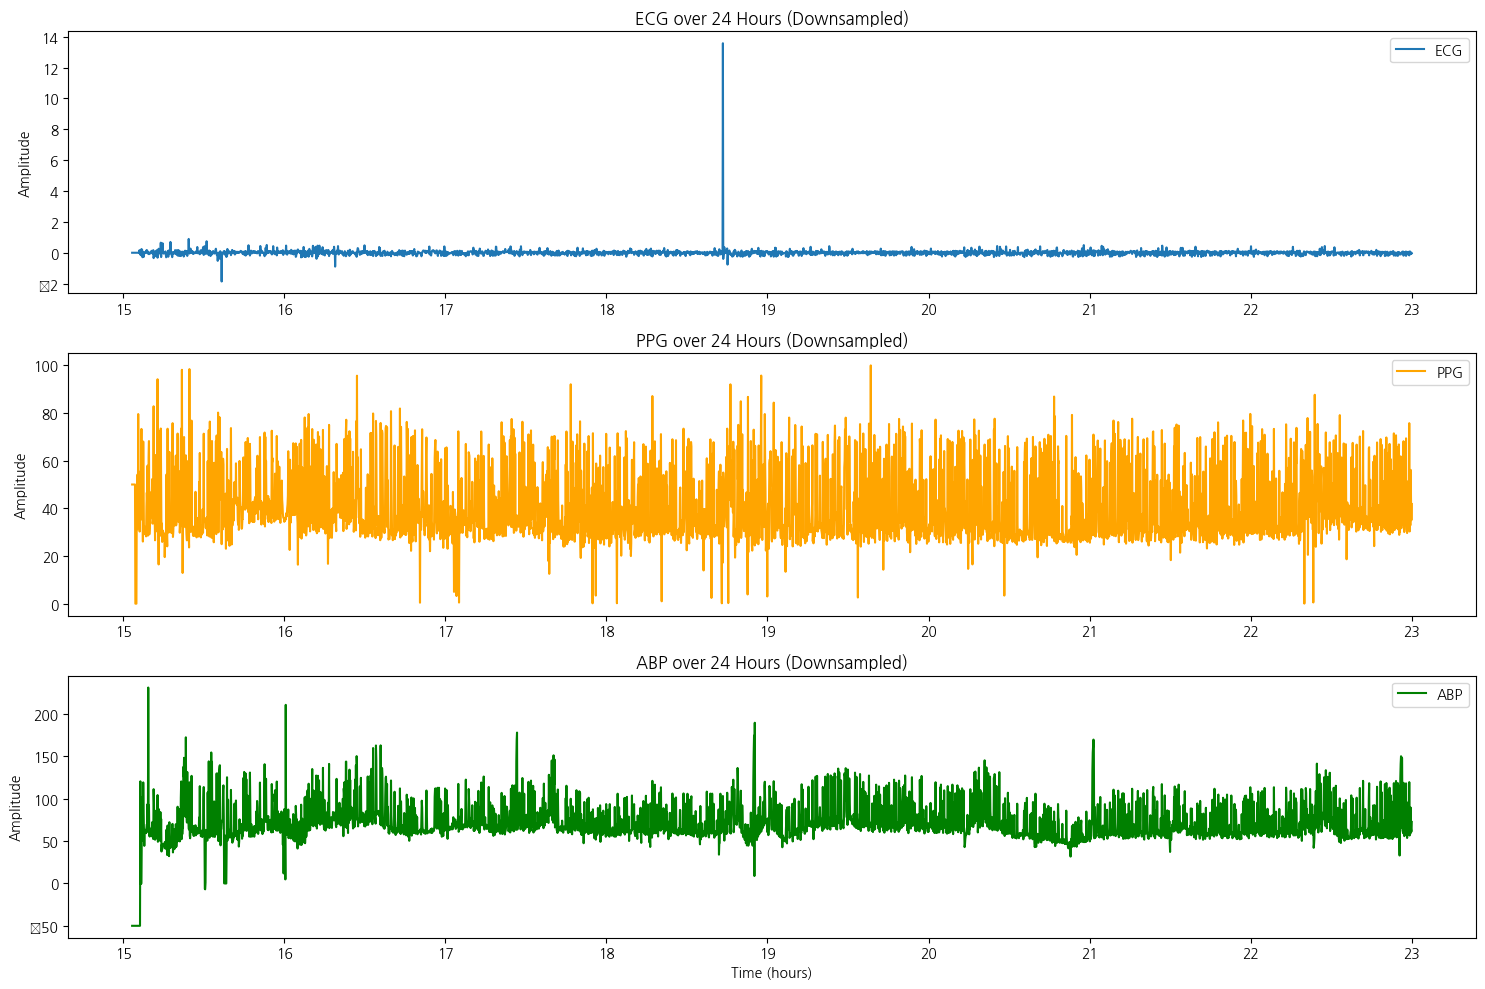

In [18]:
downsample_factor = 1000
data_downsampled = data[:, ::downsample_factor]
datenum_to_hours_downsampled = data_downsampled[3, :] * 24

plt.figure(figsize=(15, 10))

time_vector_hours_downsampled = datenum_to_hours_downsampled


plt.subplot(3, 1, 1)
plt.plot(time_vector_hours_downsampled, data_downsampled[0, :], label='ECG')
plt.legend()
plt.title('ECG over 24 Hours (Downsampled)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(time_vector_hours_downsampled, data_downsampled[1, :], label='PPG', color='orange')
plt.legend()
plt.title('PPG over 24 Hours (Downsampled)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(time_vector_hours_downsampled, data_downsampled[2, :], label='ABP', color='green')
plt.legend()
plt.title('ABP over 24 Hours (Downsampled)')
plt.ylabel('Amplitude')


plt.xlabel('Time (hours)')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### 다른 데이터 EDA

/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


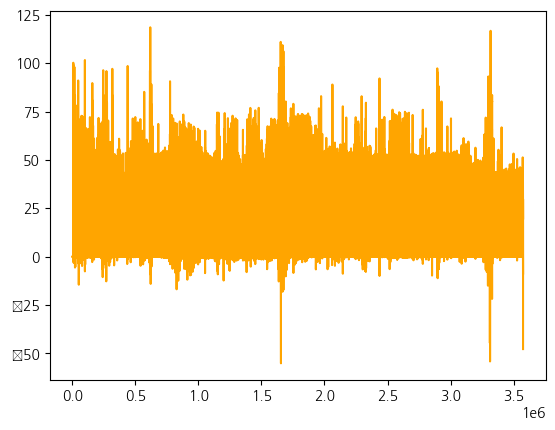

In [21]:
ppg_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/PPG_10409339_220610.npy'

ppg_data = np.load(ppg_path)   

plt.plot(ppg_data, label='PPG', color='orange')

/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


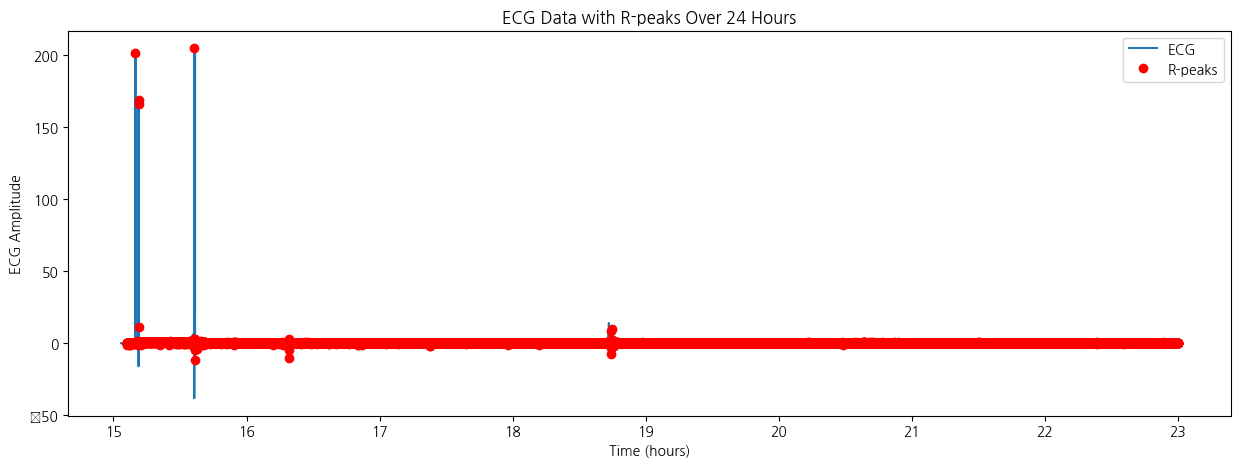

In [25]:
# Rpeak

rpeak_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/Rpeak_10409339_220610.npy'
rpeak_data = np.load(rpeak_path)

datenum_to_hours = data[3, :] * 24

rpeak_indices = rpeak_data.flatten()
rpeak_times_corrected = datenum_to_hours[rpeak_indices]

rpeak_times_corrected[:10]

plt.figure(figsize=(15, 5))

plt.plot(datenum_to_hours, data[0, :], label='ECG')

plt.plot(rpeak_times_corrected, data[0, rpeak_indices], 'ro', label='R-peaks')

plt.title('ECG Data with R-peaks Over 24 Hours')
plt.xlabel('Time (hours)')
plt.ylabel('ECG Amplitude')
plt.legend()

### ECG 이상치 제거

- 임계값 설정 : 데이터에서 직접 임계값을 설정하여 그 범위를 벗어나는 포인트를 이상치로 간주하고 제거 
- 통계적 방법 : 평균과 표준편차를 계산하고, 이를 기반으로 이상치를 정의하여 제거. 
- 자동 감지 알고리즘 : R-peak 검출과 같은 경우 이상치를 자동으로 감지하고 필터링

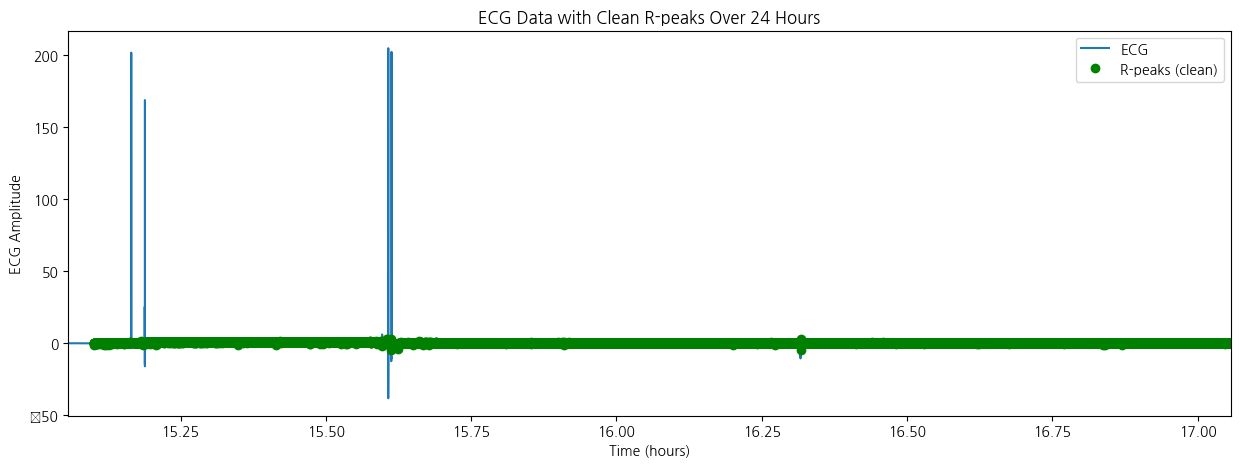

In [26]:
# 통계적 방법으로 제거

rpeak_amplitudes = data[0, rpeak_indices]
mean_amplitude = np.mean(rpeak_amplitudes)
std_amplitude = np.std(rpeak_amplitudes)

outlier_indices = np.where((rpeak_amplitudes < mean_amplitude - 3 * std_amplitude) | 
                           (rpeak_amplitudes > mean_amplitude + 3 * std_amplitude))[0]

rpeak_indices_clean = np.delete(rpeak_indices, outlier_indices)
rpeak_times_clean = np.delete(rpeak_times_corrected, outlier_indices)

plt.figure(figsize=(15, 5))

plt.plot(datenum_to_hours, data[0, :], label='ECG')

plt.plot(rpeak_times_clean, data[0, rpeak_indices_clean], 'go', label='R-peaks (clean)')

plt.title('ECG Data with Clean R-peaks Over 24 Hours')
plt.xlabel('Time (hours)')
plt.ylabel('ECG Amplitude')
plt.legend()

hours_to_show = 2
plt.xlim(datenum_to_hours[0], datenum_to_hours[0] + hours_to_show)

plt.show()

# PAT(Paluse Arrival Time)

### PPG 데이터도 있고 WAVE에 포함된 PPG도 있음.

ECG 신호에서 R-peak의 위치와 PPG 신호에서 맥파가 말초로 전달되는 시점

In [27]:
ppg_path = '/home/minyoungxi/MINYOUNGXI/SMC/10409339/PPG_10409339_220610.npy'
ppg_data = np.load(ppg_path)

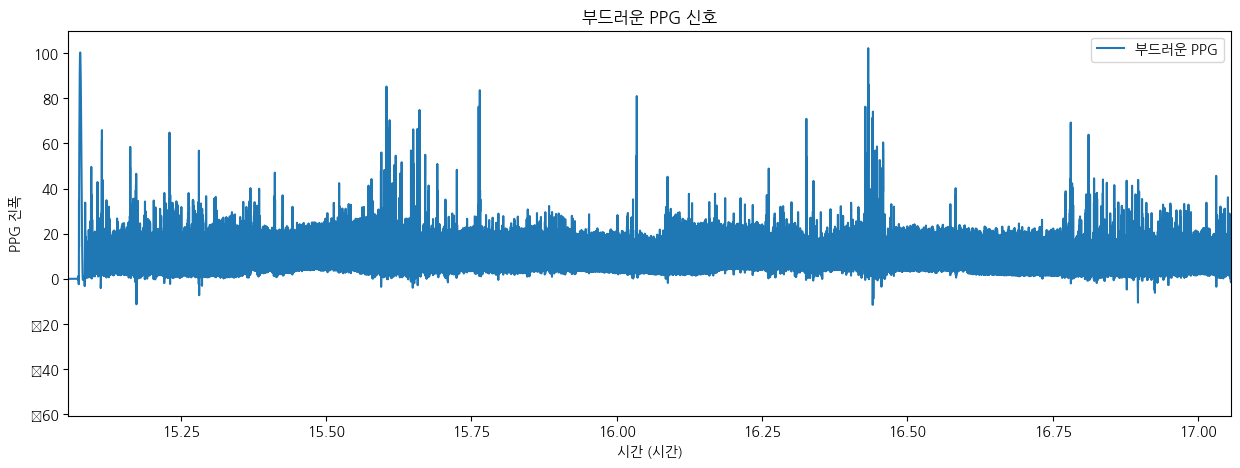

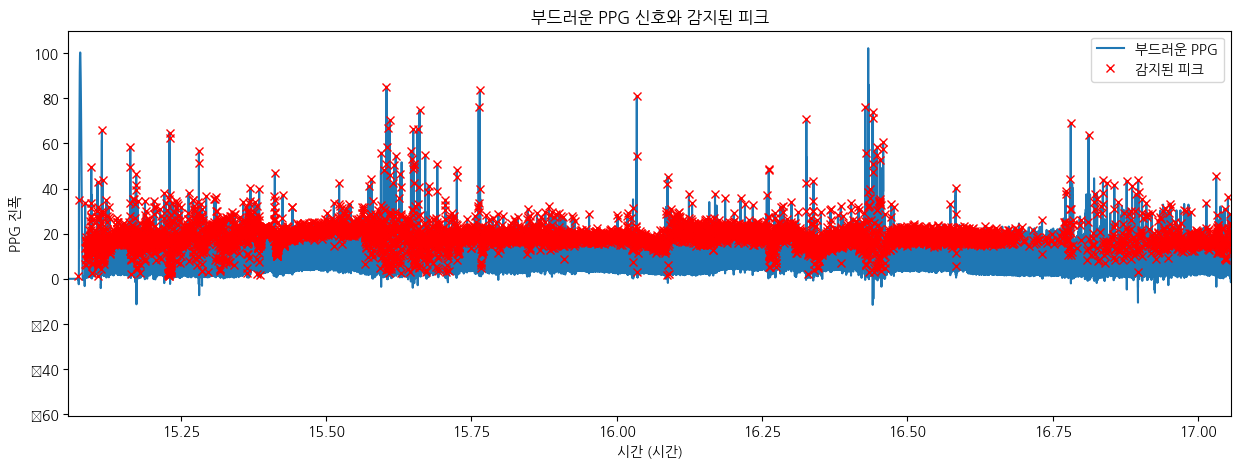

[7719, 8191, 12977, 13081, 13165, 13248, 13323, 13414, 13510, 13653]

In [29]:
# 간단한 이동 평균을 정의하여 PPG 신호를 부드럽게 합니다.
def moving_average(signal, window_size=10):
    cumsum_vec = np.cumsum(np.insert(signal, 0, 0)) 
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

# 이동 평균을 적용하여 PPG 신호를 부드럽게 합니다.
window_size = 50  # 이 값은 샘플링 레이트에 따라 조정될 수 있습니다.
ppg_smoothed = moving_average(ppg_data.flatten(), window_size)

# 스무딩된 신호 길이에 맞추기 위해 시간 배열을 짧게 줄입니다.
shortened_time = datenum_to_hours[window_size - 1:]

# 스무딩된 PPG 신호를 그래프로 그립니다.
plt.figure(figsize=(15, 5))

# 스무딩된 PPG 신호를 그립니다.
plt.plot(shortened_time, ppg_smoothed, label='부드러운 PPG')

# 레이블과 제목을 추가합니다.
plt.title('부드러운 PPG 신호')
plt.xlabel('시간 (시간)')
plt.ylabel('PPG 진폭')
plt.legend()

# 세부 사항을 더 잘 볼 수 있도록 더 작은 시간 프레임으로 확대합니다.
plt.xlim(shortened_time[0], shortened_time[0] + hours_to_show)

plt.show()

# 이제 수동으로 피크 감지 알고리즘을 구현하여 PPG 신호에서 수축기 피크를 찾습니다.
# 이것은 기본적인 방법이며 정확한 결과를 위해 정제가 필요할 수 있습니다.

def detect_peaks(signal, threshold=0.5):
    peaks = []
    # 두 번째 포인트에서 시작해서 마지막에서 두 번째 포인트까지 진행합니다.
    for i in range(1, len(signal) - 1):
        # 피크는 그 앞뒤의 포인트보다 높아야 합니다.
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] > threshold:
            peaks.append(i)
    return peaks

# 여기서는 예시로 임계값을 0.5로 설정했지만, 신호에 따라 이 값을 조정해야 합니다.
ppg_peaks = detect_peaks(ppg_smoothed, threshold=0.5)

# 감지된 피크를 그래프로 그립니다.
plt.figure(figsize=(15, 5))

# 부드러운 PPG 신호를 그립니다.
plt.plot(shortened_time, ppg_smoothed, label='부드러운 PPG')

# 감지된 피크를 그립니다.
plt.plot(shortened_time[ppg_peaks], ppg_smoothed[ppg_peaks], 'rx', label='감지된 피크')

# 레이블과 제목을 추가합니다.
plt.title('부드러운 PPG 신호와 감지된 피크')
plt.xlabel('시간 (시간)')
plt.ylabel('PPG 진폭')
plt.legend()

# 감지된 피크를 더 잘 보기 위해 더 작은 시간 프레임으로 확대합니다.
plt.xlim(shortened_time[0], shortened_time[0] + hours_to_show)

plt.show()

# 확인을 위해 처음 몇 개의 감지된 피크를 보여줍니다.
ppg_peaks[:10]


In [31]:
adjusted_ppg_peaks_indices = [peak + window_size - 1 for peak in ppg_peaks]

exceeding_indices = [index for index in adjusted_ppg_peaks_indices if index >= len(shortened_time)]

if exceeding_indices:
    adjusted_ppg_peaks_indices = [index for index in adjusted_ppg_peaks_indices if index < len(shortened_time)]

ppg_peak_times = shortened_time[adjusted_ppg_peaks_indices]

adjusted_rpeak_times = rpeak_times_clean - datenum_to_hours[0]

# PPG와 R-peak의 시간 값이 시간 단위로 되어 있으므로, 빼기를 위해 밀리초로 변환할 필요가 없습니다.
# 이번에는 PAT 값을 초 단위로 다시 계산해보고, 그 다음 밀리초로 변환합니다.

pat_values_seconds = []
for rpeak_time in adjusted_rpeak_times:
    # R-peak 이후에 발생하는 첫 번째 PPG 피크의 인덱스를 찾습니다.
    subsequent_ppg_peaks = ppg_peak_times[ppg_peak_times > rpeak_time]
    if len(subsequent_ppg_peaks) > 0:
        # R-peak 이후 가장 가까운 PPG 피크를 찾습니다.
        closest_ppg_peak = subsequent_ppg_peaks[0]
        # PAT을 초 단위로 계산합니다.
        pat_seconds = closest_ppg_peak - rpeak_time
        pat_values_seconds.append(pat_seconds)
    else:
        # R-peak 이후 PPG 피크를 찾을 수 없으면 PAT을 계산할 수 없습니다.
        pat_values_seconds.append(None)

# PAT 값을 초에서 밀리초로 변환합니다.
pat_values_ms_corrected = [pat * 1000 if pat is not None else None for pat in pat_values_seconds]

# 첫 몇 개의 PAT 값을 밀리초 단위로 표시합니다.
pat_values_ms_corrected[:10]


[15030.30776977539,
 15030.11417388916,
 15029.9072265625,
 15029.708862304688,
 15029.524803161621,
 15029.342651367188,
 15029.158592224121,
 15028.755187988281,
 15028.36799621582,
 15028.18489074707]

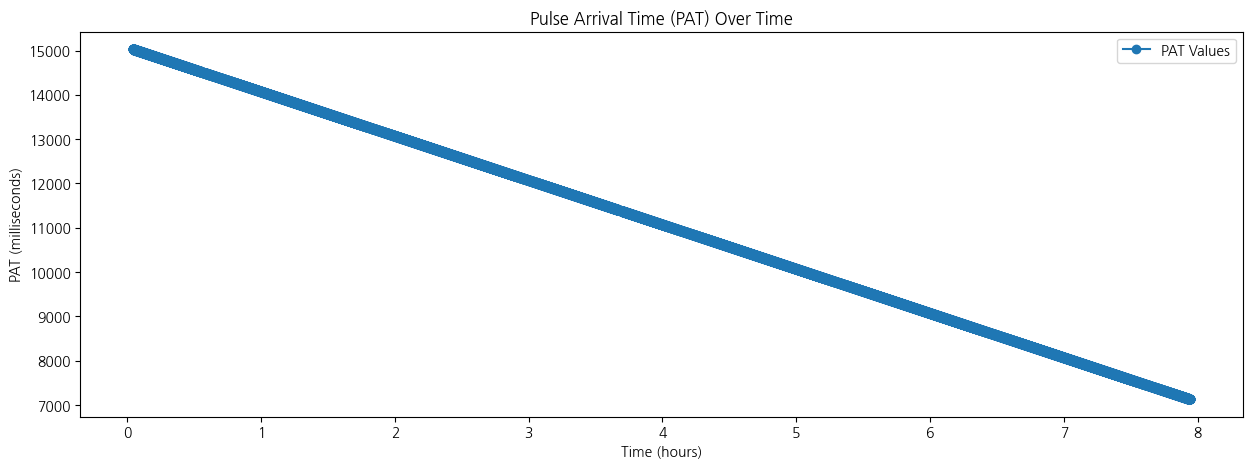

In [32]:
pat_values_ms_valid = [pat for pat in pat_values_ms_corrected if pat is not None]

rpeak_times_valid = [rpeak_time for rpeak_time, pat in zip(adjusted_rpeak_times, pat_values_ms_corrected) if pat is not None]

plt.figure(figsize=(15, 5))
plt.plot(rpeak_times_valid, pat_values_ms_valid, 'o-', label='PAT Values')
plt.title('Pulse Arrival Time (PAT) Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('PAT (milliseconds)')
plt.legend()
plt.show()
